In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_parquet('./data/combined data/data.parquet')

In [4]:
df

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
0,NORMAL,257,13,2023-04-30 23:54:00,S Bouquet Ave & Sennott St,2023-04-30 23:59:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
1,NORMAL,351,13,2023-04-30 10:21:00,S Bouquet Ave & Sennott St,2023-04-30 10:27:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
2,NORMAL,310,13,2023-04-30 03:59:00,S Bouquet Ave & Sennott St,2023-04-30 04:04:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
3,NORMAL,408,13,2023-04-30 00:44:00,S Bouquet Ave & Sennott St,2023-04-30 00:50:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
4,NORMAL,417,13,2023-04-29 09:19:00,S Bouquet Ave & Sennott St,2023-04-29 09:26:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350490,GRACE_PERIOD,22,43,2023-10-01 15:19:46,Eliza St & Lytle St,2023-10-01 15:20:08,43,Eliza St & Lytle St,MEMBER,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:00:22
350491,GRACE_PERIOD,5,43,2023-09-19 11:44:30,Eliza St & Lytle St,2023-09-19 11:44:35,43,Eliza St & Lytle St,MEMBER,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:00:05
350492,NORMAL,1531,43,2023-09-13 12:31:42,Eliza St & Lytle St,2023-09-13 12:57:13,43,Eliza St & Lytle St,CASUAL,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:25:31
350493,NORMAL,1782,43,2023-09-05 20:05:42,Eliza St & Lytle St,2023-09-05 20:35:24,43,Eliza St & Lytle St,CASUAL,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:29:42


In [5]:
df.shape

(350495, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350495 entries, 0 to 350494
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   Closed Status               350495 non-null  object         
 1   Duration                    350495 non-null  int64          
 2   Start Station Id            350495 non-null  int64          
 3   Start Date                  350495 non-null  datetime64[ns] 
 4   Start Station Name          350495 non-null  object         
 5   End Date                    350495 non-null  datetime64[ns] 
 6   End Station Id              350495 non-null  int64          
 7   End Station Name            350495 non-null  object         
 8   Rider Type                  350495 non-null  object         
 9   Start Station Total Docks   350495 non-null  int64          
 10  Start Station Latitude      350495 non-null  float64        
 11  Start Station Longitude   

In [7]:
df['Closed Status'].unique()

array(['NORMAL', 'TERMINATED', 'None', 'FORCED_CLOSED', 'GRACE_PERIOD'],
      dtype=object)

In [8]:
df.isna().sum()

Closed Status                 0
Duration                      0
Start Station Id              0
Start Date                    0
Start Station Name            0
End Date                      0
End Station Id                0
End Station Name              0
Rider Type                    0
Start Station Total Docks     0
Start Station Latitude        0
Start Station Longitude       0
Start Station Neighborhood    0
End Station Total Docks       0
End Station Latitude          0
End Station Longitude         0
End Station Neighborhood      0
Trip Distance (km)            0
Trip Time                     0
dtype: int64

In [9]:
df['Closed Status'].value_counts()

NORMAL           322246
GRACE_PERIOD      21492
None               6097
FORCED_CLOSED       372
TERMINATED          288
Name: Closed Status, dtype: int64

In [10]:
df['Trip Distance (km)'].mean()

1.2608308314687209

In [11]:
df['Trip Distance (km)'].median()

0.8740520972080654

In [12]:
df

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
0,NORMAL,257,13,2023-04-30 23:54:00,S Bouquet Ave & Sennott St,2023-04-30 23:59:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
1,NORMAL,351,13,2023-04-30 10:21:00,S Bouquet Ave & Sennott St,2023-04-30 10:27:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
2,NORMAL,310,13,2023-04-30 03:59:00,S Bouquet Ave & Sennott St,2023-04-30 04:04:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
3,NORMAL,408,13,2023-04-30 00:44:00,S Bouquet Ave & Sennott St,2023-04-30 00:50:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
4,NORMAL,417,13,2023-04-29 09:19:00,S Bouquet Ave & Sennott St,2023-04-29 09:26:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350490,GRACE_PERIOD,22,43,2023-10-01 15:19:46,Eliza St & Lytle St,2023-10-01 15:20:08,43,Eliza St & Lytle St,MEMBER,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:00:22
350491,GRACE_PERIOD,5,43,2023-09-19 11:44:30,Eliza St & Lytle St,2023-09-19 11:44:35,43,Eliza St & Lytle St,MEMBER,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:00:05
350492,NORMAL,1531,43,2023-09-13 12:31:42,Eliza St & Lytle St,2023-09-13 12:57:13,43,Eliza St & Lytle St,CASUAL,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:25:31
350493,NORMAL,1782,43,2023-09-05 20:05:42,Eliza St & Lytle St,2023-09-05 20:35:24,43,Eliza St & Lytle St,CASUAL,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:29:42


In [13]:
df['Start Station Name'].value_counts().head(10)

S Bouquet Ave & Sennott St                  30370
Boulevard of the Allies & Parkview Ave      23974
N Dithridge St & Centre Ave                 20830
Forbes Ave & Schenley Dr                    20164
O'Hara St and University Place              18575
Atwood St & Bates St                        14262
Zulema St & Coltart Ave                     13585
Allequippa St & Darragh St                  13047
S 27th St & Sidney St. (Southside Works)    12861
Fifth Ave & S Bouquet St                    11584
Name: Start Station Name, dtype: int64

In [14]:
df['Start Station Name'].value_counts().tail(10)

Tioga St & N Homewood Ave          482
Bedford Ave & Memory Ln            308
Rosetta St & N Aiken Ave           213
Hamilton Ave & Fifth Ave           201
Centre Ave & Heldman St            196
Second Ave & Tecumseh St           148
Eliza St & Lytle St                136
N Braddock Ave & Frankstown Ave    125
Wilkinsburg Park & Ride            118
N Braddock Ave & Hamilton Ave      102
Name: Start Station Name, dtype: int64

In [15]:
df['End Station Name'].value_counts().head(10)

S Bouquet Ave & Sennott St                  31570
Boulevard of the Allies & Parkview Ave      22912
Forbes Ave & Schenley Dr                    21726
O'Hara St and University Place              19255
N Dithridge St & Centre Ave                 18209
Zulema St & Coltart Ave                     14876
S 27th St & Sidney St. (Southside Works)    14230
Atwood St & Bates St                        13828
Fifth Ave & S Bouquet St                    11229
Schenley Dr & Schenley Dr Ext                9628
Name: End Station Name, dtype: int64

In [16]:
df['End Station Name'].value_counts().tail(10)

Tioga St & N Homewood Ave          568
Centre Ave & Heldman St            215
Hamilton Ave & Fifth Ave           208
Wilkinsburg Park & Ride            205
Second Ave & Tecumseh St           197
Bedford Ave & Memory Ln            182
Rosetta St & N Aiken Ave           143
N Braddock Ave & Frankstown Ave    139
Eliza St & Lytle St                125
N Braddock Ave & Hamilton Ave      110
Name: End Station Name, dtype: int64

In [17]:
df['Start Station Neighborhood'].value_counts()

Central Oakland          89622
North Oakland            72787
Downtown                 33140
Shadyside                24454
South Side Flats         22406
Bloomfield               16710
Terrace Village          13047
Strip District           12596
West Oakland             11584
North Shore               7972
South Shore               7248
Lower Lawrenceville       7129
Friendship                6527
Central Lawrenceville     4991
East Liberty              4402
Hazelwood                 3445
South Oakland             2869
Chateau                   2865
Allegheny Center          2517
Upper Lawrenceville       1036
Middle Hill                861
Homewood South             584
Central Northside          542
Hill District              308
Garfield                   213
Larimer                    201
Crawford-Roberts           196
Homewood North             125
Wilkinsburg                118
Name: Start Station Neighborhood, dtype: int64

In [18]:
df['End Station Neighborhood'].value_counts()

Central Oakland          90530
North Oakland            72877
Downtown                 33328
Shadyside                25251
South Side Flats         24227
Bloomfield               15758
Strip District           13025
West Oakland             11229
Terrace Village           8302
North Shore               8268
South Shore               7190
Lower Lawrenceville       7171
Friendship                6972
Central Lawrenceville     5353
East Liberty              4545
Hazelwood                 3464
Chateau                   3136
South Oakland             3049
Allegheny Center          2639
Upper Lawrenceville       1168
Homewood South             678
Middle Hill                655
Central Northside          588
Crawford-Roberts           215
Larimer                    208
Wilkinsburg                205
Hill District              182
Garfield                   143
Homewood North             139
Name: End Station Neighborhood, dtype: int64

In [19]:
set(df['Start Station Neighborhood'].unique().tolist()).intersection(set(df['End Station Neighborhood'].unique().tolist()))

{'Allegheny Center',
 'Bloomfield',
 'Central Lawrenceville',
 'Central Northside',
 'Central Oakland',
 'Chateau',
 'Crawford-Roberts',
 'Downtown',
 'East Liberty',
 'Friendship',
 'Garfield',
 'Hazelwood',
 'Hill District',
 'Homewood North',
 'Homewood South',
 'Larimer',
 'Lower Lawrenceville',
 'Middle Hill',
 'North Oakland',
 'North Shore',
 'Shadyside',
 'South Oakland',
 'South Shore',
 'South Side Flats',
 'Strip District',
 'Terrace Village',
 'Upper Lawrenceville',
 'West Oakland',
 'Wilkinsburg'}

## Total trips to or through the strip district

#### starting or ending in the strip

In [20]:
df[(df['Start Date'].dt.year.isin([2023])) & ((df['Start Station Neighborhood']=='Strip District') | (df['End Station Neighborhood']=='Strip District'))]

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
14838,NORMAL,1039,4,2023-12-23 18:12:13,Burns White Center at 3 Crossings,2023-12-23 18:29:32,34,N Dithridge St & Centre Ave,MEMBER,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:17:19
14839,NORMAL,850,4,2023-12-17 14:18:02,Burns White Center at 3 Crossings,2023-12-17 14:32:12,34,N Dithridge St & Centre Ave,MEMBER,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:14:10
14840,NORMAL,857,4,2023-02-16 15:03:51,Burns White Center at 3 Crossings,2023-02-16 15:18:08,34,N Dithridge St & Centre Ave,CASUAL,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:14:17
14844,NORMAL,916,4,2023-03-23 12:50:47,Burns White Center at 3 Crossings,2023-03-23 13:06:03,34,N Dithridge St & Centre Ave,CASUAL,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:15:16
14845,NORMAL,894,4,2023-03-02 14:54:28,Burns White Center at 3 Crossings,2023-03-02 15:09:22,34,N Dithridge St & Centre Ave,CASUAL,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:14:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350182,NORMAL,1106,47,2023-11-12 20:04:27,17th St & Penn Ave,2023-11-12 20:22:53,56,Rosetta St & N Aiken Ave,MEMBER,19,40.449626,-79.985918,Strip District,15,40.467018,-79.935232,Garfield,4.713031,0 days 00:18:26
350183,NORMAL,902,47,2023-10-05 16:47:48,17th St & Penn Ave,2023-10-05 17:02:50,56,Rosetta St & N Aiken Ave,MEMBER,19,40.449626,-79.985918,Strip District,15,40.467018,-79.935232,Garfield,4.713031,0 days 00:15:02
350184,NORMAL,1024,47,2023-10-04 17:46:37,17th St & Penn Ave,2023-10-04 18:03:41,56,Rosetta St & N Aiken Ave,MEMBER,19,40.449626,-79.985918,Strip District,15,40.467018,-79.935232,Garfield,4.713031,0 days 00:17:04
350185,NORMAL,1092,47,2023-09-27 17:53:39,17th St & Penn Ave,2023-09-27 18:11:51,56,Rosetta St & N Aiken Ave,MEMBER,19,40.449626,-79.985918,Strip District,15,40.467018,-79.935232,Garfield,4.713031,0 days 00:18:12


In [21]:
df[(df['Start Date'].dt.year==2024) & (df['Start Date'].dt.month==4)]['Start Date'].dt.day.max()

nan

In [22]:
strip_district_data = df[((df['Start Station Neighborhood'] == 'Strip District') | (df['End Station Neighborhood'] == 'Strip District'))& 
                         (df['Start Date'].dt.year.isin([2023, 2024]))]

In [23]:
grouped_data = strip_district_data.groupby(strip_district_data['Start Date'].dt.date).size()

In [24]:
grouped_data.index = pd.to_datetime(grouped_data.index)

In [25]:
cumulative_rides_2023 = grouped_data[grouped_data.index.year == 2023].cumsum()
cumulative_rides_2024 = grouped_data[grouped_data.index.year == 2024].cumsum()

In [26]:
monthFmt = mdates.DateFormatter('%b')

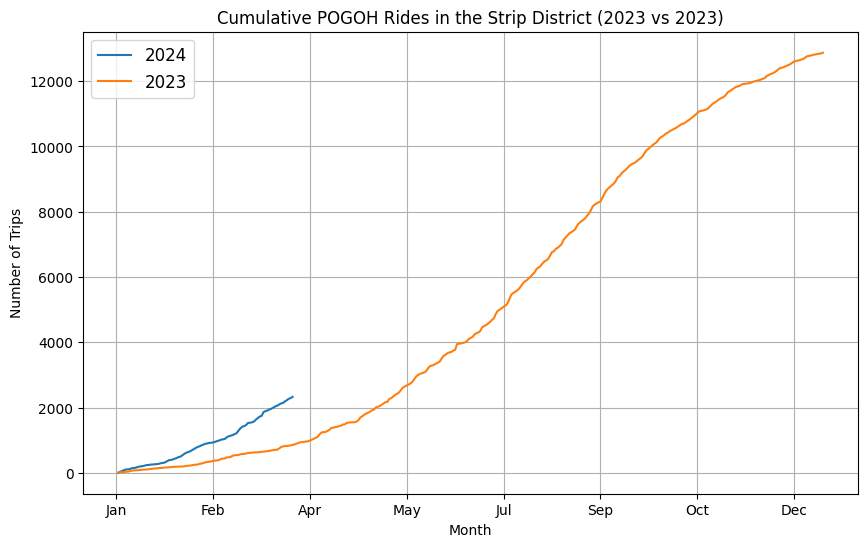

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rides_2024.index.dayofyear, cumulative_rides_2024, label='2024')
plt.plot(cumulative_rides_2023.index.dayofyear, cumulative_rides_2023, label='2023')
plt.legend(fontsize='large')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.title("Cumulative POGOH Rides in the Strip District (2023 vs 2023)")
plt.gca().xaxis.set_major_formatter(monthFmt)

In [78]:
total_rides_2022 = df[df['Start Date'].dt.year==2022].groupby(df['Start Date'].dt.month).size()
total_rides_2023 = df[df['Start Date'].dt.year==2023].groupby(df['Start Date'].dt.month).size()
total_rides_2024 = df[df['Start Date'].dt.year==2024].groupby(df['Start Date'].dt.month).size()

Text(0, 0.5, 'Total Rides')

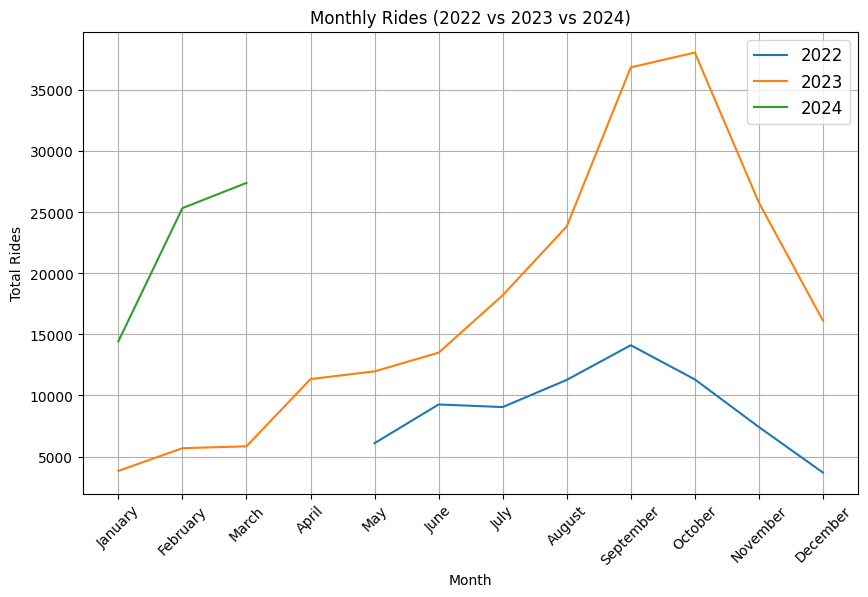

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(total_rides_2022.index, total_rides_2022, label='2022')
plt.plot(total_rides_2023.index, total_rides_2023, label='2023')
plt.plot(total_rides_2024.index, total_rides_2024, label='2024')
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(np.arange(1, len(month_names)+1), month_names, rotation=45)
plt.legend(fontsize='large')
plt.grid(True)
plt.title("Monthly Rides (2022 vs 2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Total Rides")

#### trips that almost certaintly went through the strip

In [28]:
set1 = ['Downtown', 'North Shore', 'Allegheny Center', 'Chateau', 'Central Northside', 'South Shore']
set2 = ['Lower Lawrenceville', 'Central Lawrenceville', 'Upper Lawrenceville', 'Bloomfield', 'Garfield', 'Shadyside', 'Friendship', 'East Liberty', 'Larimer']

In [29]:
df[((df['Start Date'].dt.year.isin([2023])) & (df['Start Station Neighborhood'].isin(set1)) & (df['End Station Neighborhood'].isin(set2))) |
   ((df['Start Date'].dt.year.isin([2023])) & (df['Start Station Neighborhood'].isin(set2)) & (df['End Station Neighborhood'].isin(set1)))]

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
146024,NORMAL,3502,6,2023-08-19 17:33:22,10th St & Penn Ave,2023-08-19 18:31:44,15,Ivy St & Walnut St,CASUAL,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:58:22
146025,NORMAL,3534,6,2023-08-19 17:32:42,10th St & Penn Ave,2023-08-19 18:31:36,15,Ivy St & Walnut St,MEMBER,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:58:54
146026,NORMAL,1294,6,2023-08-13 04:39:29,10th St & Penn Ave,2023-08-13 05:01:03,15,Ivy St & Walnut St,CASUAL,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:21:34
146027,NORMAL,1339,6,2023-12-02 13:28:00,10th St & Penn Ave,2023-12-02 13:50:19,15,Ivy St & Walnut St,MEMBER,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:22:19
146030,NORMAL,2238,6,2023-07-20 18:02:57,10th St & Penn Ave,2023-07-20 18:40:15,15,Ivy St & Walnut St,CASUAL,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:37:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350187,NORMAL,1641,40,2023-08-19 14:22:53,7th St & Penn Ave,2023-08-19 14:50:14,56,Rosetta St & N Aiken Ave,MEMBER,19,40.443419,-80.000311,Downtown,15,40.467018,-79.935232,Garfield,6.110652,0 days 00:27:21
350188,NORMAL,1616,40,2023-10-10 17:50:15,7th St & Penn Ave,2023-10-10 18:17:11,56,Rosetta St & N Aiken Ave,MEMBER,19,40.443419,-80.000311,Downtown,15,40.467018,-79.935232,Garfield,6.110652,0 days 00:26:56
350189,NORMAL,1111,40,2023-10-09 17:38:32,7th St & Penn Ave,2023-10-09 17:57:03,56,Rosetta St & N Aiken Ave,MEMBER,19,40.443419,-80.000311,Downtown,15,40.467018,-79.935232,Garfield,6.110652,0 days 00:18:31
350190,NORMAL,1366,40,2023-09-20 17:43:36,7th St & Penn Ave,2023-09-20 18:06:22,56,Rosetta St & N Aiken Ave,MEMBER,19,40.443419,-80.000311,Downtown,15,40.467018,-79.935232,Garfield,6.110652,0 days 00:22:46


#### where do trips starting in the hill district go?

In [30]:
hill_neighborhoods = ['Middle Hill', 'Crawford-Roberts']

In [31]:
df[df['Start Station Neighborhood'].isin(hill_neighborhoods)]['End Station Neighborhood'].value_counts()

Downtown                 330
South Side Flats         130
Middle Hill              117
North Oakland             74
Strip District            53
Crawford-Roberts          53
Hill District             44
Central Oakland           44
Shadyside                 37
Terrace Village           34
South Shore               23
Bloomfield                20
Allegheny Center          20
East Liberty              18
West Oakland              17
Lower Lawrenceville       16
Chateau                    8
Friendship                 6
North Shore                5
Central Lawrenceville      4
South Oakland              2
Upper Lawrenceville        1
Central Northside          1
Name: End Station Neighborhood, dtype: int64